In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folderPath = "/Users/jwh/Desktop/0726/result/"

In [3]:
fileList = [file for file in sorted(glob.glob(folderPath + "*")) if os.path.isfile(file)]

print(fileList)

['/Users/jwh/Desktop/0726/result/Base123.csv', '/Users/jwh/Desktop/0726/result/Base456.csv', '/Users/jwh/Desktop/0726/result/s1_10.csv', '/Users/jwh/Desktop/0726/result/s1_20.csv', '/Users/jwh/Desktop/0726/result/s1_30.csv', '/Users/jwh/Desktop/0726/result/s1_40.csv', '/Users/jwh/Desktop/0726/result/s1_50.csv', '/Users/jwh/Desktop/0726/result/s2_10.csv', '/Users/jwh/Desktop/0726/result/s2_20.csv', '/Users/jwh/Desktop/0726/result/s2_30.csv', '/Users/jwh/Desktop/0726/result/s2_40.csv', '/Users/jwh/Desktop/0726/result/s2_50.csv', '/Users/jwh/Desktop/0726/result/s3_10.csv', '/Users/jwh/Desktop/0726/result/s3_20.csv', '/Users/jwh/Desktop/0726/result/s3_30.csv', '/Users/jwh/Desktop/0726/result/s3_40.csv', '/Users/jwh/Desktop/0726/result/s3_50.csv', '/Users/jwh/Desktop/0726/result/s4_10.csv', '/Users/jwh/Desktop/0726/result/s4_20.csv', '/Users/jwh/Desktop/0726/result/s4_30.csv', '/Users/jwh/Desktop/0726/result/s4_40.csv', '/Users/jwh/Desktop/0726/result/s4_50.csv', '/Users/jwh/Desktop/0726/re

In [4]:
sensor1Data = pd.DataFrame()
sensor2Data = pd.DataFrame()
sensor3Data = pd.DataFrame()
sensor4Data = pd.DataFrame()
sensor5Data = pd.DataFrame()
sensor6Data = pd.DataFrame()
base123Mean = pd.DataFrame()
base456Mean = pd.DataFrame()

In [5]:
for file in fileList:
    name = file.split(f"{folderPath}")[1]
    name = name.split(".")[0]

    if name.startswith("s"):
        distance = name.split("_")[1]
        distance = distance.split(".")[0]

        if name.split("_")[0] == "s1":
            sensorData = pd.read_csv(file, sep= ",", usecols= [0], names = [f"d{distance}"], skiprows= 200)
            sensor1Data = pd.concat((sensor1Data, sensorData), axis = 1)
            
        elif name.split("_")[0] == "s2":
            sensorData = pd.read_csv(file, sep= ",", usecols= [1], names = [f"d{distance}"], skiprows= 200)
            sensor2Data = pd.concat((sensor2Data, sensorData), axis = 1)

        elif name.split("_")[0] == "s3":
            sensorData = pd.read_csv(file, sep= ",", usecols= [2], names = [f"d{distance}"], skiprows= 200)
            sensor3Data = pd.concat((sensor3Data, sensorData), axis = 1)

        elif name.split("_")[0] == "s4":
            sensorData = pd.read_csv(file, sep= ",", usecols= [3], names = [f"d{distance}"], skiprows= 200)
            sensor4Data = pd.concat((sensor4Data, sensorData), axis = 1)

        elif name.split("_")[0] == "s5":
            sensorData = pd.read_csv(file, sep= ",", usecols= [4], names = [f"d{distance}"], skiprows= 200)
            sensor5Data = pd.concat((sensor5Data, sensorData), axis = 1)

        elif name.split("_")[0] == "s6":
            sensorData = pd.read_csv(file, sep= ",", usecols= [5], names = [f"d{distance}"], skiprows= 200)
            sensor6Data = pd.concat((sensor6Data, sensorData), axis = 1)

    elif name.endswith("123"):
        base = pd.read_csv(file, sep= ",", usecols= [0, 1, 2])
        baseMean = base.mean(axis = 0)
        base123Mean = pd.concat((base123Mean, baseMean), axis= 1).T.to_numpy().reshape(3,)
        
    elif name.endswith("456"):
        base = pd.read_csv(file, sep= ",", usecols= [3, 4, 5])
        baseMean = base.mean(axis= 0)
        base456Mean = pd.concat((base456Mean, baseMean), axis= 1).T.to_numpy().reshape(3,)

In [6]:
scaledSensor1 = sensor1Data - base123Mean[0]
scaledSensor2 = sensor2Data - base123Mean[1]
scaledSensor3 = sensor3Data - base123Mean[2]
scaledSensor4 = sensor4Data - base456Mean[0]
scaledSensor5 = sensor5Data - base456Mean[1]
scaledSensor6 = sensor6Data - base456Mean[2]

In [7]:
scaledSensor1Mean = pd.DataFrame(scaledSensor1.mean(axis= 0), columns= ["s1"])
scaledSensor2Mean = pd.DataFrame(scaledSensor2.mean(axis= 0), columns= ["s2"])
scaledSensor3Mean = pd.DataFrame(scaledSensor3.mean(axis= 0), columns= ["s3"])
scaledSensor4Mean = pd.DataFrame(scaledSensor4.mean(axis= 0), columns= ["s4"])
scaledSensor5Mean = pd.DataFrame(scaledSensor5.mean(axis= 0), columns= ["s5"])
scaledSensor6Mean = pd.DataFrame(scaledSensor6.mean(axis= 0), columns= ["s6"])

In [8]:
scaledSensor1Mean

,s1
d10,-1211.253561
d20,-511.143698
d30,-160.422100
d40,-69.499503
d50,-36.804122


In [9]:
distanceList = [i for i in np.arange(10, 60, 10)]
distanceList = pd.DataFrame(distanceList)

In [10]:
distanceIndex = [f"d{i}" for i in np.arange(10, 60, 10)]
distanceList.index = distanceIndex
distanceList.columns = ["distance"]

In [11]:
def concatScaledData(scaledData):
    res = pd.concat((distanceList, scaledData), axis= 1)
    return res

In [12]:
scaledSensor1Mean = concatScaledData(scaledSensor1Mean)
scaledSensor2Mean = concatScaledData(scaledSensor2Mean)
scaledSensor3Mean = concatScaledData(scaledSensor3Mean)
scaledSensor4Mean = concatScaledData(scaledSensor4Mean)
scaledSensor5Mean = concatScaledData(scaledSensor5Mean)
scaledSensor6Mean = concatScaledData(scaledSensor6Mean)

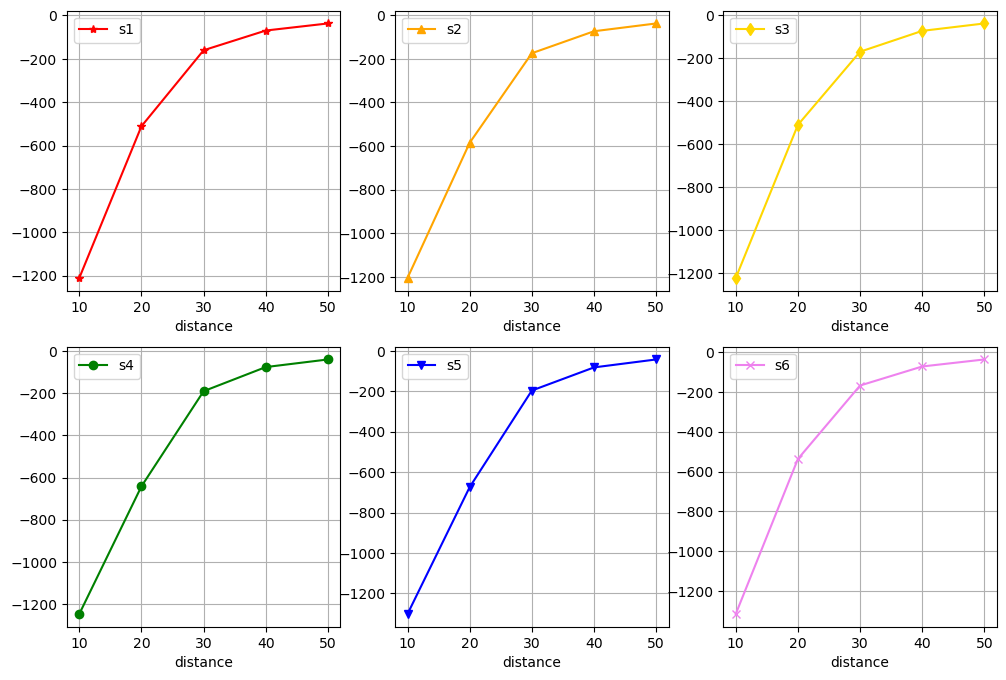

In [25]:
fig, axs  = plt.subplots(2, 3, figsize= (12, 8))
scaledSensor1Mean.plot.line(x= "distance", y= "s1", c= "red", ax= axs[0, 0], marker= "*", grid= True)
scaledSensor2Mean.plot.line(x= "distance", y= "s2", c= "orange", ax= axs[0, 1], marker= "^", grid= True)
scaledSensor3Mean.plot.line(x= "distance", y= "s3", c= "gold", ax= axs[0, 2], marker= "d", grid= True)
scaledSensor4Mean.plot.line(x= "distance", y= "s4", c= "green", ax= axs[1, 0], marker= "o", grid= True)
scaledSensor5Mean.plot.line(x= "distance", y= "s5", c= "blue", ax= axs[1, 1], marker= "v", grid= True)
scaledSensor6Mean.plot.line(x= "distance", y= "s6", c= "violet", ax= axs[1, 2], marker= "x", grid= True)

plt.show()